<a href="https://colab.research.google.com/github/AmirBekhit/apple_stock_price_prediction/blob/master/apple_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [9]:
# load data [ Netflix stock data]
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL (1).csv


In [10]:
# Store the data into a data frame
df = pd.read_csv('AAPL.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [11]:
# Get the number of trading days
df.shape

(184, 7)

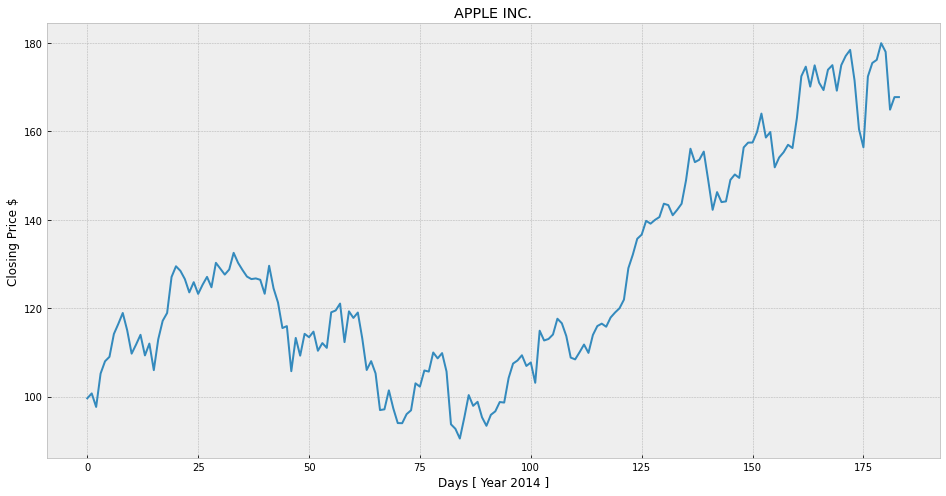

In [20]:
# visulaize the closing price data
plt.figure(figsize=(16,8))
plt.title('APPLE INC.')
plt.xlabel('Days [ Year 2014 ]')
plt.ylabel('Closing Price $')
plt.plot(df['Close'])
plt.show()

In [21]:
# Get the close price
df = df[['Close']]
df.head(3)

,Close
0,99.620003
1,100.730003
2,97.669998


In [25]:
#Create a variable to predict "n" days in the future
f_days = 20
#create a new column (target) shifted "n" days
df['Predictions'] = df[['Close']].shift(-f_days)
df.tail(3)


,Close,Predictions
181,164.940002,NaN
182,167.779999,NaN
183,167.779999,NaN


In [26]:
#create the feature data set(n) and convert it to a numpy array and remove the last 'n' days
N = np.array(df.drop(['Predictions'], 1))[:-f_days]
print(N)

[[ 99.620003]
 [100.730003]
 [ 97.669998]
 [105.220001]
 [108.      ]
 [109.010002]
 [114.18    ]
 [116.470001]
 [118.93    ]
 [115.      ]
 [109.730003]
 [111.779999]
 [113.989998]
 [109.330002]
 [112.010002]
 [105.989998]
 [112.980003]
 [117.160004]
 [118.93    ]
 [127.080002]
 [129.5     ]
 [128.460007]
 [126.599998]
 [123.589996]
 [125.900002]
 [123.25    ]
 [125.32    ]
 [127.099998]
 [124.75    ]
 [130.279999]
 [128.949997]
 [127.620003]
 [128.770004]
 [132.539993]
 [130.279999]
 [128.649994]
 [127.169998]
 [126.599998]
 [126.75    ]
 [126.440002]
 [123.279999]
 [129.619995]
 [124.5     ]
 [121.300003]
 [115.519997]
 [115.959999]
 [105.760002]
 [113.290001]
 [109.269997]
 [114.209999]
 [113.449997]
 [114.709999]
 [110.379997]
 [112.120003]
 [111.040001]
 [119.080002]
 [119.5     ]
 [121.059998]
 [112.339996]
 [119.300003]
 [117.809998]
 [119.029999]
 [113.18    ]
 [106.029999]
 [108.029999]
 [105.260002]
 [ 96.959999]
 [ 97.129997]
 [101.419998]
 [ 97.339996]
 [ 94.019997]
 [ 93.

In [28]:
#Create the target data set (B) and convert it to a numpy array and get all of the target values except the last x rows
B = np.array(df['Predictions'])[:-f_days]
print(B)

[129.5      128.460007 126.599998 123.589996 125.900002 123.25
 125.32     127.099998 124.75     130.279999 128.949997 127.620003
 128.770004 132.539993 130.279999 128.649994 127.169998 126.599998
 126.75     126.440002 123.279999 129.619995 124.5      121.300003
 115.519997 115.959999 105.760002 113.290001 109.269997 114.209999
 113.449997 114.709999 110.379997 112.120003 111.040001 119.080002
 119.5      121.059998 112.339996 119.300003 117.809998 119.029999
 113.18     106.029999 108.029999 105.260002  96.959999  97.129997
 101.419998  97.339996  94.019997  93.989998  96.040001  96.910004
 103.010002 102.260002 105.919998 105.669998 109.989998 108.660004
 109.849998 105.68      93.739998  92.720001  90.519997  95.220001
 100.349998  97.919998  98.830002  95.330002  93.400002  95.889999
  96.68      98.779999  98.660004 104.209999 107.480003 108.18
 109.360001 106.940002 107.730003 103.129997 114.919998 112.709999
 113.050003 114.059998 117.629997 116.599998 113.720001 108.839996
 10

In [30]:
# Split the data into 80%training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(N, B, test_size = 0.20)

In [31]:
#Create the models
#Create decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)


In [33]:
# Get the last X rows of the feature data set
x_future = df.drop(['Predictions'],1) [:-f_days]
x_future = x_future.tail(f_days)
x_future = np.array(x_future)
x_future

array([[144.179993],
       [149.039993],
       [150.270004],
       [149.5     ],
       [156.389999],
       [157.479996],
       [157.5     ],
       [159.860001],
       [164.050003],
       [158.630005],
       [159.880005],
       [151.889999],
       [154.119995],
       [155.300003],
       [156.990005],
       [156.25    ],
       [163.050003],
       [172.5     ],
       [174.669998],
       [170.149994]])

In [35]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[174.970001 171.050003 169.369995 173.970001 175.009995 176.210007
 176.210007 177.089996 178.460007 171.509995 160.5      156.410004
 156.990005 175.5      176.210007 179.979996 178.460007 164.940002
 167.779999 167.779999]

[151.23518628 156.02390421 157.23587453 156.47716425 163.266107
 164.34011691 164.35982751 166.68521416 170.81376102 165.47325863
 166.70492476 158.83210891 161.02939736 162.19209807 163.85731266
 163.12816138 169.82842811 179.13982113 181.27799157 176.82428289]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


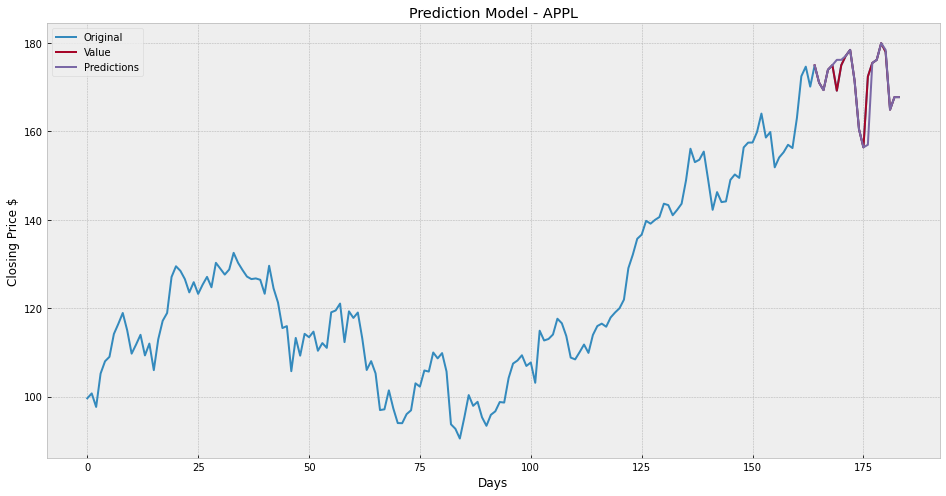

In [40]:
# Visualize the data - first with the decision tree prediction model
predictions = tree_prediction
valid = df[N.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Prediction Model - APPL')
plt.xlabel('Days')
plt.ylabel('Closing Price $')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Value', 'Predictions'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


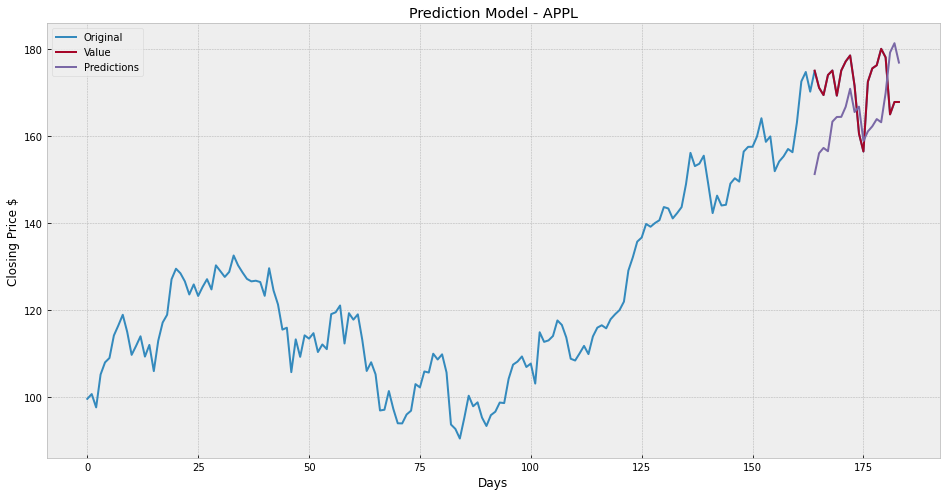

In [42]:
# Visualize the data - second with linear regression model
predictions = lr_prediction
valid = df[N.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Prediction Model - APPL')
plt.xlabel('Days')
plt.ylabel('Closing Price $')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Value', 'Predictions'])
plt.show()